<a id="000"></a>
# Predicting Sales using marketing budget !

## [1. Aim](#1)
## [2. Exploratory Data Analysis](#2)

## [3. Prepare data for Machine Learning](#3)
#### [3.1 Transformation Pipelines](#3.1)
#### [3.2 One Hot Encoded Dataframe](#3.2)

## [4. Train and fine tune models](#4)
#### [4.1 Linear Regression](#4.1)
#### [4.2 Random Forest Regressor](#4.2)
#### [4.3 Ridge Regression](#4.3)
#### [4.4 Lasso Regression](#4.4)

## [5. Conclusion](#5)
#### [5.1 Models Comparison](#5.1)
#### [5.2 Feature Importance](#5.2)
#### [5.3 Eli5 Library](#5.3)
#### [5.4 References](#5.4)




<a id="1"></a>
<div class="alert alert-block alert-info">
<b>1. AIM </b> </div>


The aim of the project is to predict sales (in million) using the following data

- TV promotion budget (in million)
- Social Media promotion budget (in million)
- Radio promotion budget (in million)
- Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer


<a id="2"></a>
<div class="alert alert-block alert-info">
<b>2. Exploratory Data Analysis</b> </div>

[Back to top of notebook](#000)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
sns.set(rc={'figure.figsize':(18, 10)})

#### Display the names of the rows and columns.


In [3]:
df = pd.read_csv("Data_HSS.csv")

#### View the head of the data


In [4]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


#### How many columns and rows has the data got ?


In [5]:
df.shape

(4572, 5)

There are 4572 rows and 5 columns in our dataset

#### How many null values has the dataset got ?


In [6]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

#### As there are few missing values, we can drop the null values !


In [7]:
df = df.dropna()

#### How many columns and rows has this new data got ?


In [230]:
df.shape

(4546, 5)

#### What data types have the columns got ?


In [8]:
df.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

There are 4 numerical and one categorical column in our dataset

#### Examine the head of the data


In [10]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


#### Describe the data set

In [11]:
df.describe()

,TV,Radio,Social Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


This shows that the columns of data 

- Have got same values in all columns
- Has got different means across the columns
- Has got different standard deviation

#### Plot the pair plot of dataset which would plot the relation across numerical columns and histograms in the diagonal columns

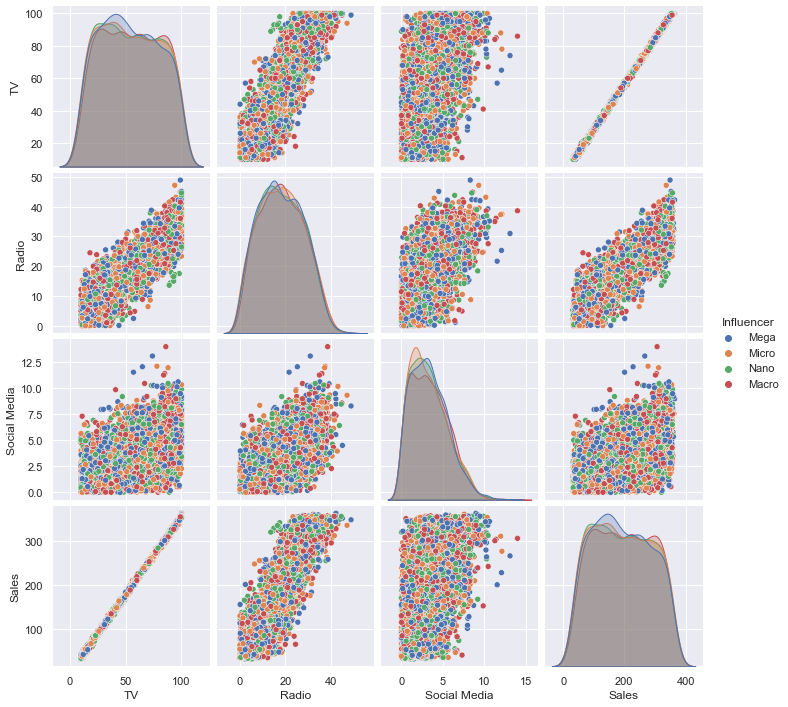

In [729]:
sns.pairplot(df, hue='Influencer')

The above pair plot shows that:-

- As the TV promotion increase, Sales increase !
- As the Radio promotion budget increase, Sales increase but there is more variation along the y axis!
- As the Social Media promotion budget increase, Sales increase but the trend is very different than that of TV!


To view this more clearly, we can make scatter plots for each of the numerical columns and see how they affect Sales !

#### Plot TV promotion against Sales with Influencer as hue

<AxesSubplot:xlabel='TV', ylabel='Sales'>

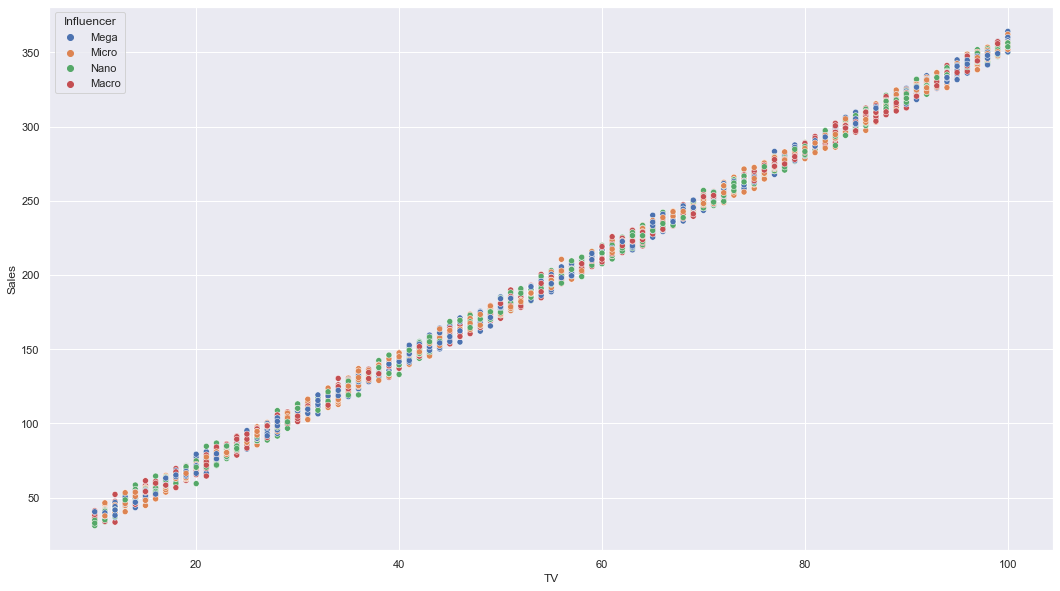

In [730]:
sns.scatterplot(data=df, x='TV', y='Sales', hue='Influencer' )

<div class="alert alert-block alert-success">
<b>Outcome : </b> The scatter plot shows clearly that as the TV promotion budget increases, Sales increase too !
</div>

#### Plot Radio promotion against Sales with Influencer as hue

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

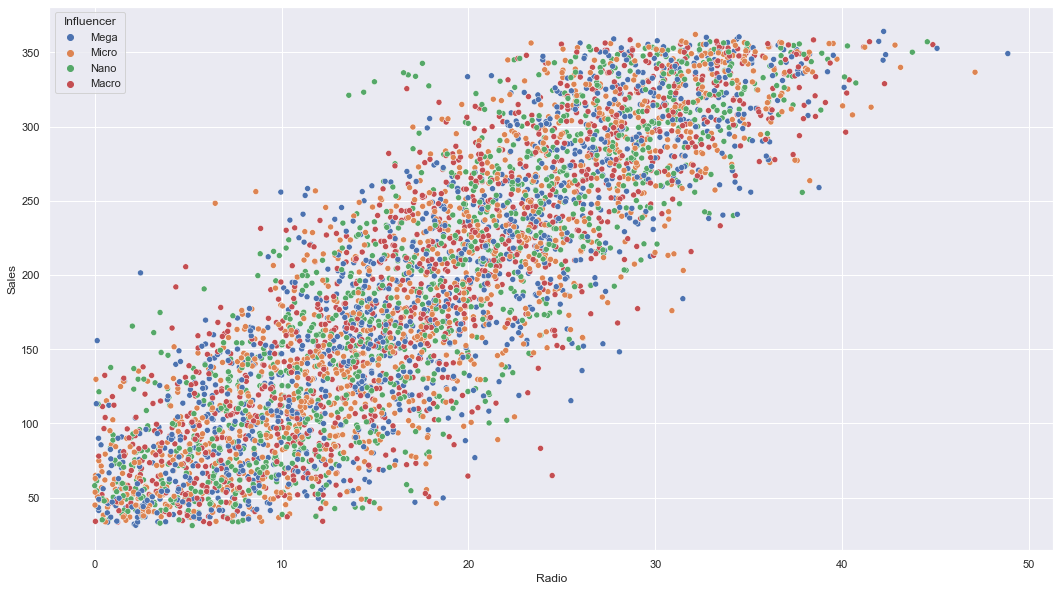

In [850]:
sns.scatterplot(data=df, x='Radio', y='Sales', hue='Influencer' )

<div class="alert alert-block alert-success">
<b>Outcome : </b> The scatter plot shows clearly that as the Radio promotion budget increases, Sales increase too !
</div>

#### Plot Social Media promotion budget against Sales with Influencer as hue

<AxesSubplot:xlabel='Social Media', ylabel='Sales'>

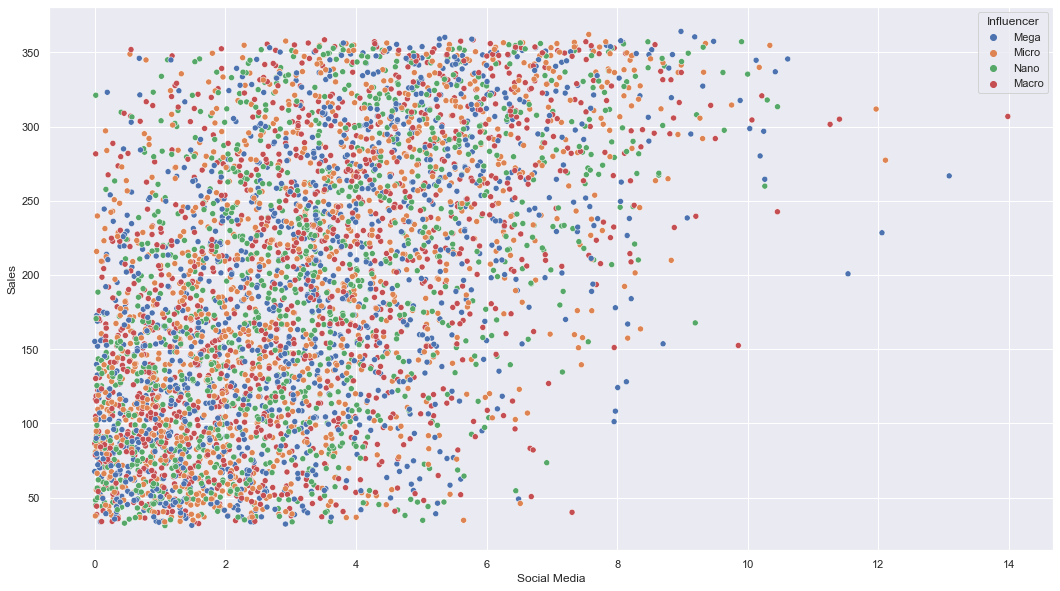

In [851]:
sns.scatterplot(data=df, x='Social Media', y='Sales', hue='Influencer' )

<div class="alert alert-block alert-success">
<b>Outcome : </b> The scatter plot shows the trend has got variation but as the Social Media budget increases, Sales increase too !
</div>

#### Plot box plot of Influencers against Sales to see the distribution and effect of different influencers on Sales

<AxesSubplot:xlabel='Influencer', ylabel='Sales'>

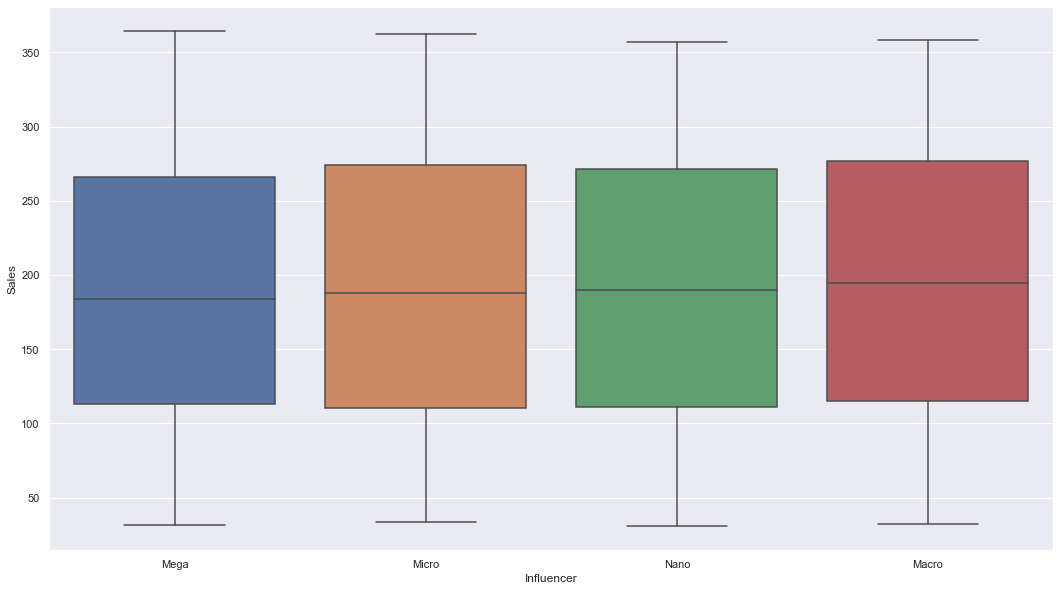

In [16]:
sns.boxplot(data=df,
           x="Influencer", 
            y="Sales")

In [17]:
print(df.groupby("Influencer").Sales.mean())


Influencer
Macro    196.066150
Mega     190.412908
Micro    191.578370
Nano     191.708827
Name: Sales, dtype: float64


In [18]:
df.Influencer.value_counts()

Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: Influencer, dtype: int64

<div class="alert alert-block alert-success">
<b>Outcome : </b> The box plot shows that there is not much difference in the distribution which is then confirmed when we use groupby. The means values are close to each other as well ! The value count of the infuencers are similar too
</div>

<a id="3"></a>
<div class="alert alert-block alert-info">
<b>3. Prepare data for Machine Learning</b> </div>

[Back to top of notebook](#000)

#### Separate the features as X and targets as y

In [19]:
X = df.drop('Sales', axis=1)

In [20]:
X.head()

,TV,Radio,Social Media,Influencer
0,16.0,6.566231,2.907983,Mega
1,13.0,9.237765,2.409567,Mega
2,41.0,15.886446,2.913410,Mega
3,83.0,30.020028,6.922304,Mega
4,15.0,8.437408,1.405998,Micro


In [21]:
y = df['Sales']

#### Import all libraries in the following block of code for readable code

In [448]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer


#### Divide the data into training and testing sets

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [328]:
X_train.head()

,TV,Radio,Social Media,Influencer
566,96.0,33.737174,8.701501,Micro
3972,22.0,2.685571,2.783753,Macro
2123,34.0,19.684568,5.029559,Macro
3305,33.0,13.193298,0.782495,Micro
4358,78.0,21.967468,2.471421,Micro


#### Check the data types of our training data

In [329]:
X_train.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
dtype: object

<a id="3.1"></a>
## 3.1 Transformation Pipelines

[Back to top of notebook](#000)

#### Make a list for numerical features column names and categorical features column names

In [330]:
num_features = ["TV", "Radio", "Social Media"]

cat_features = ["Influencer"]

#### Define numerical Pipeline which would use standard scaler

In [331]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

#### Define categorical Pipeline which would use One Hot Encoding

In [332]:
cat_pipeline = Pipeline([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
])


#### Define full pipeline which would combine categorical pipeline and numerical pipelines

In [333]:
full_pipeline = ColumnTransformer([
    ("numerical", num_pipeline, num_features),
    ("categorical", cat_pipeline, cat_features),
])

#### Fit and transform the pipeline on training data

In [336]:
full_pipeline.fit(X_train)

full_pipeline.transform(X_train)

array([[ 1.60426873,  1.60708463,  2.44575014, ...,  0.        ,
         1.        ,  0.        ],
       [-1.22133784, -1.6053864 , -0.24621731, ...,  0.        ,
         0.        ,  0.        ],
       [-0.76313137,  0.15325983,  0.77539337, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.7249475 , -0.16447672, -0.17621722, ...,  0.        ,
         0.        ,  1.        ],
       [-0.61039588, -0.94588662, -1.10888463, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.45875256,  1.13805179,  1.70761605, ...,  0.        ,
         1.        ,  0.        ]])

<a id="3.2"></a>
## 3.2 One Hot Encoded Dataframe

[Back to top of notebook](#000)

#### Get the array of one hot encoded categories from the full pipeline

In [337]:
# Get the list of categories generated by the process
ohe_categories = full_pipeline.named_transformers_["categorical"][0].categories_

In [338]:
ohe_categories

[array(['Macro', 'Mega', 'Micro', 'Nano'], dtype=object)]

Above is an efficient way of generating the categories from preprocessor itself. 

It should be noted that these categories are in alphabetical order and can be replicated as follows:-


#### Show how the categories can also be taken manually by another method

In [353]:
manual_categories = X.Influencer.unique()

In [354]:
manual_categories.sort()

In [355]:
print(manual_categories)

['Macro' 'Mega' 'Micro' 'Nano']


#### Make a list to combine the categorical column name with the categories in that column

In [853]:
# This is the categorical column in our dataframe
cat_features

['Influencer']

In [854]:
# These are the categories in the column of Influencer
ohe_categories

[array(['Macro', 'Mega', 'Micro', 'Nano'], dtype=object)]

In [340]:
# Create names for one hot encoded columns so that they can be understood in our dataframe instead of matrix of array

new_ohe_features = []


for col, vals in zip(cat_features, ohe_categories):
    for val in vals:
        new_ohe_features.append(str(col) + "__" + str(val))

In [341]:
new_ohe_features

['Influencer__Macro',
 'Influencer__Mega',
 'Influencer__Micro',
 'Influencer__Nano']

In [342]:
# Create a new list with all names of features
all_features = num_features + new_ohe_features

#### Tranform the train and test dataset and give them the column names so we know which features play a part

In [344]:
X_train = pd.DataFrame(full_pipeline.transform(X_train), columns=all_features)
X_test = pd.DataFrame(full_pipeline.transform(X_test), columns=all_features)

#### Examine the first few rows of training data

In [345]:
X_train.head()

,TV,Radio,Social Media,Influencer__Macro,Influencer__Mega,Influencer__Micro,Influencer__Nano
0,1.604269,1.607085,2.445750,0.0,0.0,1.0,0.0
1,-1.221338,-1.605386,-0.246217,1.0,0.0,0.0,0.0
2,-0.763131,0.153260,0.775393,1.0,0.0,0.0,0.0
3,-0.801315,-0.518300,-1.156584,0.0,0.0,1.0,0.0
4,0.916959,0.389439,-0.388297,0.0,0.0,1.0,0.0


#### Examine the first few rows of test data

In [346]:
X_test.head()

,TV,Radio,Social Media,Influencer__Macro,Influencer__Mega,Influencer__Micro,Influencer__Nano
0,-1.488625,-1.519260,-0.469100,0.0,0.0,1.0,0.0
1,-1.297706,-1.080730,-0.342413,0.0,1.0,0.0,0.0
2,0.802407,0.221998,-0.954298,0.0,0.0,1.0,0.0
3,0.038730,0.197117,-0.271409,0.0,1.0,0.0,0.0
4,0.878775,1.391485,2.025187,0.0,0.0,0.0,1.0


<a id="4"></a>
<div class="alert alert-block alert-info">
<b> 4. Train and Fine-Tune models</b> </div>

[Back to top of notebook](#000)

<a id="4.1"></a>
## 4.1. Linear Regression

[Back to top of notebook](#000)

#### Define Linear Regression model

In [855]:
lin_reg = LinearRegression()

#### Define the parameters grid for Linear Regression

In [778]:
param_grid = [
    {'fit_intercept' : [True, False]}
]

#### Define the Grid Search CV with linear regression model and pass parameter grid in it with 5 folds

In [779]:
linreg_grid_search = GridSearchCV(lin_reg, param_grid, cv=5,
                                  scoring='neg_mean_squared_error',
                                  return_train_score=True)

#### Fit the Grid Search

In [780]:
linreg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error')

#### Find the best parameters of grid search

In [781]:
linreg_grid_search.best_params_

{'fit_intercept': False}

#### How did both of the parameters score in our 5 slpits?

In [782]:
cvres_linreg = linreg_grid_search.cv_results_

In [783]:
for mean_score, params in zip(cvres_linreg["mean_test_score"], cvres_linreg["params"]):
    print(np.sqrt(-mean_score), params)

2.973008330674379 {'fit_intercept': True}
2.9730083306743778 {'fit_intercept': False}


In [784]:
linreg_cvres = pd.DataFrame(cvres_linreg)

In [785]:
linreg_cvres.iloc[:, 6:12]

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score
0,-9.352735,-9.086627,-8.736442,-8.700867,-8.317221,-8.838779
1,-9.352735,-9.086627,-8.736442,-8.700867,-8.317221,-8.838779


#### Select the tuned model as the model

In [811]:
linreg_tuned = linreg_grid_search.best_estimator_

In [789]:
from sklearn.metrics import mean_squared_error

In [472]:
sales_predictions_linreg_train = linreg_tuned.predict(X_train)

#### Metrics on training set

In [614]:
lin_mse_train = mean_squared_error(y_train, sales_predictions_linreg_train)

In [615]:
lin_rmse_train = np.sqrt(lin_mse_train)
lin_rmse_train

2.9642897971413884

#### Metrics on test set

In [475]:
sales_predictions_linreg_test = linreg_tuned.predict(X_test)

In [477]:
lin_mse_test = mean_squared_error(y_test,sales_predictions_linreg_test)

In [478]:
lin_rmse_test = np.sqrt(lin_mse_test)

lin_rmse_test

2.884903518340301

<div class="alert alert-block alert-success">
<b></b> The training score and test score are close to each other !
</div>

<a id="4.2"></a>
## 4.2. Random Forest Regressor

[Back to top of notebook](#000)

In [368]:
from sklearn.ensemble import RandomForestRegressor

In [860]:
forest_reg = RandomForestRegressor()

#### GridSearch for Random Forest Regressor

In [539]:
param_grid_fr = [
    {'n_estimators': [1, 2, 3], 'max_features': [1, 2, 3]},
]


fr_grid_search = GridSearchCV(forest_reg, param_grid_fr, cv=5, scoring='neg_mean_squared_error', return_train_score=True, error_score='raise')

fr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [1, 2, 3],
                          'n_estimators': [1, 2, 3]}],
             return_train_score=True, scoring='neg_mean_squared_error')

#### Best parameters of grid search

In [540]:
fr_grid_search.best_params_

{'max_features': 3, 'n_estimators': 3}

In [541]:
cvres_fr = fr_grid_search.cv_results_

for mean_score, params in zip(cvres_fr["mean_test_score"], cvres_fr["params"]):
    print(np.sqrt(-mean_score), params)
    

29.191155466636953 {'max_features': 1, 'n_estimators': 1}
17.90241718923578 {'max_features': 1, 'n_estimators': 2}
15.75744458499021 {'max_features': 1, 'n_estimators': 3}
19.05705437159976 {'max_features': 2, 'n_estimators': 1}
14.577350198422549 {'max_features': 2, 'n_estimators': 2}
12.394808076928523 {'max_features': 2, 'n_estimators': 3}
13.395246194996323 {'max_features': 3, 'n_estimators': 1}
9.878495027987153 {'max_features': 3, 'n_estimators': 2}
8.102390480040587 {'max_features': 3, 'n_estimators': 3}


In [859]:
fr_cvres = pd.DataFrame(cvres_fr)
fr_cvres.iloc[:, 6:]

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,"{'max_features': 1, 'n_estimators': 1}",-683.365397,-750.185898,-949.798495,-949.440317,-927.827681,-852.123557,112.794204,9,-231.471349,-221.620450,-415.596619,-343.060856,-314.709658,-305.291786,72.294819
1,"{'max_features': 1, 'n_estimators': 2}",-361.925556,-366.002635,-318.407324,-283.404193,-272.742998,-320.496541,38.594756,7,-96.502621,-113.554759,-109.665312,-121.807432,-142.185834,-116.743192,15.118980
2,"{'max_features': 1, 'n_estimators': 3}",-266.860728,-266.199641,-290.860189,-270.220816,-147.343925,-248.297060,51.281417,6,-73.297648,-80.532772,-107.277289,-85.040711,-56.987974,-80.627279,16.384447
3,"{'max_features': 2, 'n_estimators': 1}",-148.513967,-115.820673,-298.171153,-732.411000,-520.939815,-363.171321,233.543993,8,-65.495543,-35.203670,-122.274520,-308.245778,-145.762392,-135.396381,94.953945
4,"{'max_features': 2, 'n_estimators': 2}",-223.654175,-189.965049,-342.508204,-133.960823,-172.407442,-212.499139,71.147998,5,-65.186314,-63.733907,-105.310200,-52.892564,-57.836166,-68.991830,18.680401
5,"{'max_features': 2, 'n_estimators': 3}",-158.013977,-183.045528,-144.595346,-119.246981,-163.254504,-153.631267,21.170454,3,-60.407638,-64.283164,-46.624460,-37.927188,-59.060192,-53.660528,9.844435
6,"{'max_features': 3, 'n_estimators': 1}",-404.239685,-105.173297,-147.228648,-113.738435,-126.783038,-179.432621,113.293834,4,-129.608100,-48.230014,-63.121656,-40.335354,-38.320487,-63.923122,33.980318
7,"{'max_features': 3, 'n_estimators': 2}",-100.414334,-52.872484,-123.633869,-131.809575,-79.193058,-97.584664,28.966681,2,-48.344724,-18.662433,-46.441034,-38.379720,-33.113529,-36.988288,10.687468
8,"{'max_features': 3, 'n_estimators': 3}",-32.787931,-44.830224,-103.547415,-90.594927,-56.483160,-65.648731,27.040240,1,-12.050003,-16.840377,-36.605378,-28.117243,-20.404846,-22.803570,8.668077


#### Select the tuned model as the model

In [543]:
fr_tuned = fr_grid_search.best_estimator_

#### Metrics on training set

In [544]:
from sklearn.metrics import mean_squared_error

In [545]:
sales_predictions_fr_train = fr_tuned.predict(X_train)

In [546]:
fr_mse_train = mean_squared_error(y_train, sales_predictions_fr_train)

In [547]:
fr_rmse_train = np.sqrt(fr_mse_train)
fr_rmse_train

5.3276772860905295

#### Metrics on test set

In [548]:
sales_predictions_fr_test = fr_tuned.predict(X_test)

In [549]:
fr_mse_test = mean_squared_error(y_test,sales_predictions_fr_test)

In [550]:
fr_rmse_test = np.sqrt(fr_mse_test)

fr_rmse_test

8.536558768340171

<div class="alert alert-block alert-danger">
<b></b> This is an example of overfitting, where the score on the training data is low but the score on the test set is high ! After trying various hyper paramaters, the RMSE on test set is still higher than the Linear Regression model. The dataset maybe too simple for the model.
</div>

<a id="4.3"></a>
## 4.3. Ridge Regression

[Back to top of notebook](#000)

In [861]:
ridge = Ridge()

#### Gridsearch for Ridge Regression

In [619]:
param_grid_ridge = [
    {'alpha': [10, 50, 100]}
]


ridge_grid_search = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', return_train_score=True, error_score='raise')

ridge_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Ridge(),
             param_grid=[{'alpha': [10, 50, 100]}], return_train_score=True,
             scoring='neg_mean_squared_error')

In [620]:
ridge_grid_search.best_params_

{'alpha': 10}

In [621]:
cvres_ridge = ridge_grid_search.cv_results_

for mean_score, params in zip(cvres_ridge["mean_test_score"], cvres_ridge["params"]):
    print(np.sqrt(-mean_score), params)

3.0388193800722685 {'alpha': 10}
4.148686138580848 {'alpha': 50}
6.028677132845755 {'alpha': 100}


In [622]:
ridge_cvres = pd.DataFrame(cvres_ridge)
ridge_cvres.iloc[:, 5:11]

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,{'alpha': 10},-9.751862,-9.580670,-9.072805,-9.210132,-8.556647
1,{'alpha': 50},-17.659722,-17.988591,-16.557897,-18.067796,-15.783977
2,{'alpha': 100},-36.721334,-37.781355,-34.689406,-38.633035,-33.899610


#### Select the tuned model as the model

In [623]:
ridge_tuned = ridge_grid_search.best_estimator_

In [624]:
from sklearn.metrics import mean_squared_error

In [625]:
sales_predictions_ridge_train = ridge_tuned.predict(X_train)

#### Metrics on training set

In [626]:
ridge_mse_train = mean_squared_error(y_train, sales_predictions_ridge_train)

In [627]:
ridge_rmse_train = np.sqrt(ridge_mse_train)
ridge_rmse_train

3.007622927673834

#### Metrics on test set

In [628]:
sales_predictions_ridge_test = ridge_tuned.predict(X_test)

In [629]:
ridge_mse_test = mean_squared_error(y_test,sales_predictions_ridge_test)

In [630]:
ridge_rmse_test = np.sqrt(ridge_mse_test)

ridge_rmse_test

2.9186470563784477

<div class="alert alert-block alert-success">
<b></b> The training score and test score are close to each other !
</div>

<a id="4.4"></a>
## 4.4. Lasso Regression

[Back to top of notebook](#000)

In [862]:
lasso = Lasso()

#### Gridsearch for Lasso Regression

In [690]:
param_grid_lasso = [
    {'alpha': [1, 5, 10, 50, 100]}
]


lasso_grid_search = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error', return_train_score=True, error_score='raise')

lasso_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Lasso(),
             param_grid=[{'alpha': [1, 5, 10, 50, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [691]:
lasso_grid_search.best_params_

{'alpha': 1}

In [692]:
cvres_lasso = lasso_grid_search.cv_results_

In [693]:
for mean_score, params in zip(cvres_lasso["mean_test_score"], cvres_lasso["params"]):
    print(np.sqrt(-mean_score), params)

3.1312335422380824 {'alpha': 1}
5.816011028098644 {'alpha': 5}
10.436188804755654 {'alpha': 10}
50.120579776376516 {'alpha': 50}
93.35138221843845 {'alpha': 100}


In [694]:
lasso_cvres = pd.DataFrame(cvres_lasso)

In [695]:
lasso_cvres.iloc[:, 6:12]

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score
0,-10.166878,-9.836956,-10.243567,-9.685216,-9.090500,-9.804623
1,-35.268055,-32.792263,-35.583152,-32.672826,-32.813626,-33.825984
2,-115.443889,-106.180102,-110.290431,-103.765424,-108.890338,-108.914037
3,-2708.825093,-2481.031079,-2429.260608,-2366.829573,-2574.416233,-2512.072517
4,-9173.407654,-8655.293627,-8498.593938,-8371.437849,-8873.669743,-8714.480562


#### Select the tuned model as the model

In [696]:
lasso_tuned = lasso_grid_search.best_estimator_

In [697]:
sales_predictions_lasso_train = lasso_tuned.predict(X_train)

#### Metrics on training set

In [698]:
lasso_mse_train = mean_squared_error(y_train, sales_predictions_lasso_train)

In [699]:
lasso_rmse_train = np.sqrt(lasso_mse_train)
lasso_rmse_train

3.128888518045388

#### Metrics on test set

In [700]:
sales_predictions_lasso_test = lasso_tuned.predict(X_test)

In [701]:
lasso_mse_test = mean_squared_error(y_test,sales_predictions_lasso_test)

In [702]:
lasso_rmse_test = np.sqrt(lasso_mse_test)

lasso_rmse_test

3.02938077652718

<a id="5"></a>
<div class="alert alert-block alert-info">
<b> 5. Conclusion</b> </div>

[Back to top of notebook](#000)

<a id="5.1"></a>
## 5.1 Model Comparison

In [704]:
rmse_all = {
    'Linear Regression' : lin_rmse_test,
    'Random Forest Regressor' : fr_rmse_test,
    'Ridge Regression' : ridge_rmse_test,
    'Lasso Regression' : lasso_rmse_test
}

In [708]:
rmse_all

{'Linear Regression': 2.884903518340301,
 'Random Forest Regressor': 8.536558768340171,
 'Ridge Regression': 2.9186470563784477,
 'Lasso Regression': 3.02938077652718}

#### RMSE comparison

In [863]:
df_rmse = pd.DataFrame.from_dict(rmse_all, orient='index')

In [864]:
df_rmse.columns = ['Root Mean Square Error']

In [866]:
df_rmse.sort_values(by='Root Mean Square Error')

,Root Mean Square Error
Linear Regression,2.884904
Ridge Regression,2.918647
Lasso Regression,3.029381
Random Forest Regressor,8.536559


<div class="alert alert-block alert-success">
<b></b> Linear Regression is the simplest model and the model with the best RMSE score and should be selected !
</div>

<a id="5.2"></a>
## 5.2 Feature Importance

[Back to top of notebook](#000)

#### Get the coefficients of the selected model

In [867]:
coefs = pd.DataFrame(
   linreg_tuned.coef_,
   columns=['Coefficients'], index=X_train.columns)

#### Plot the coefficients on the bar chart for clarity

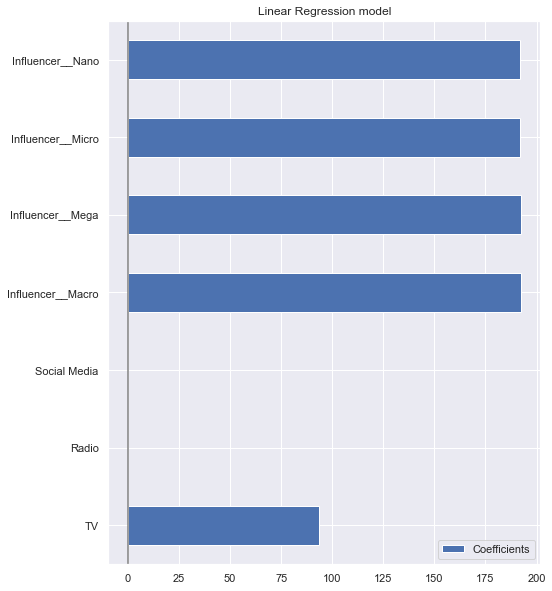

In [870]:
coefs.plot(kind='barh', figsize=(10, 10))
plt.title('Linear Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

<a id="5.3"></a>
## 5.3 Permutation Importance using Eli5 

[Back to top of notebook](#000)

#### Get all features of the dataset

In [719]:
all_features = X_train.columns.to_list()

In [720]:
all_features

['TV',
 'Radio',
 'Social Media',
 'Influencer__Macro',
 'Influencer__Mega',
 'Influencer__Micro',
 'Influencer__Nano']

#### Import eli5 and Permutation Importance

In [721]:
import eli5

In [722]:
from eli5.sklearn import PermutationImportance

#### Assign the tuned model

In [725]:
perm = PermutationImportance(linreg_tuned, scoring=None)

#### Fit permutation importance on test data

In [726]:
perm.fit(X_test, y_test)

PermutationImportance(estimator=LinearRegression(fit_intercept=False))

In [871]:
eli5.show_weights(perm, feature_names=all_features)

Weight,Feature
1.9670 ± 0.1421,TV
1.6737 ± 0.1256,Influencer__Micro
1.6393 ± 0.1813,Influencer__Nano
1.6261 ± 0.1174,Influencer__Mega
1.6032 ± 0.0465,Influencer__Macro
-0.0000 ± 0.0000,Radio
-0.0000 ± 0.0000,Social Media


<div class="alert alert-block alert-success">
<b> The business recommendation from this analysis is to use the marketing budget on the combination of TV and Influencers to increase the sales !</b> 
</div>


<a id="5.4"></a>
## 5.4 References

- https://medium.com/analytics-vidhya/why-should-i-trust-your-model-bdda6be94c6f
- https://www.youtube.com/watch?v=s-yT5Is1G1A
- https://www.youtube.com/watch?v=OAY9zDpoNRE&list=PLpoCVQU4m6j9HDOzRBL4nX4eol9DrZ3Kd&index=2&t=625s
- https://buildmedia.readthedocs.org/media/pdf/eli5/stable/eli5.pdf
- https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html


[Back to top of notebook](#000)